In [188]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test = pd.read_csv('test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
def description():
    with open('data_description.txt','r') as f:
        print(f.read())

In [5]:
description()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
df = train.append(test)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_6712\1858088059.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


In [7]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
len(df)

2919

In [10]:
df.shape

(2919, 81)

In [11]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
                  ...    
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
HeatingQC        0.000000
Length: 81, dtype: float64

In [12]:
import pandas as pd

def missing_values_stats(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns


In [13]:
missing_values_stats(df)

Your selected dataframe has 81 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,2909,99.7
MiscFeature,2814,96.4
Alley,2721,93.2
Fence,2348,80.4
SalePrice,1459,50.0
FireplaceQu,1420,48.6
LotFrontage,486,16.6
GarageCond,159,5.4
GarageYrBlt,159,5.4
GarageFinish,159,5.4


In [14]:
# Dropping of the columns that have more then 80% of the data missing
df = df.drop(['PoolQC','MiscFeature','Fence','Alley'],axis=1)

In [15]:
missing_values_stats(df)

Your selected dataframe has 77 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values
SalePrice,1459,50.0
FireplaceQu,1420,48.6
LotFrontage,486,16.6
GarageCond,159,5.4
GarageQual,159,5.4
GarageFinish,159,5.4
GarageYrBlt,159,5.4
GarageType,157,5.4
BsmtCond,82,2.8
BsmtExposure,82,2.8


In [16]:
df['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1454      0.0
1455      0.0
1456      0.0
1457      0.0
1458     94.0
Name: MasVnrArea, Length: 2919, dtype: float64

In [17]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [18]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [19]:
missing_values_stats(df)

Your selected dataframe has 77 columns.
There are 29 columns that have missing values.


,Missing Values,% of Total Values
SalePrice,1459,50.0
FireplaceQu,1420,48.6
LotFrontage,486,16.6
GarageCond,159,5.4
GarageQual,159,5.4
GarageFinish,159,5.4
GarageYrBlt,159,5.4
GarageType,157,5.4
BsmtCond,82,2.8
BsmtExposure,82,2.8


In [20]:
def fill_missing_values(df):
    for col in df.columns:
        # Check if the column is numerical
        if df[col].dtype != 'object':
            # Check if the column has missing values
            if df[col].isnull().sum() > 0:
                # Check if the percentage of missing values is less than 2%
                if (100*df[col].isnull().sum()/len(df)) < 2:
                    # Fill missing values with the mean of the non-missing values
                    df[col].fillna(df[col].median(), inplace=True)
        # Check if the column is categorical
        else:
            # Check if the column has missing values
            if df[col].isnull().sum() > 0:
                # Check if the percentage of missing values is less than 2%
                if (100*df[col].isnull().sum()/len(df)) < 2:
                    # Fill missing values with the mode of the non-missing values
                    df[col].fillna(df[col].mode()[0], inplace=True)

# Call the function
fill_missing_values(df)


In [21]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [22]:
description()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [23]:
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [24]:
#Number of basement null values and its related features are almost same, and in the description dataset, its given there's a 
# option for no basement, and the same goes with garage

In [25]:
def fill_missing_values(df):
    for col in df.columns:
        # Check if the column is numerical
        if df[col].dtype != 'object':
            # Check if the column has missing values
            if df[col].isnull().sum() > 0:
                # Check if the percentage of missing values is less than 10%
                if (100*df[col].isnull().sum()/len(df)) < 10:
                    # Fill missing values with the mean of the non-missing values
                    df[col].fillna(0, inplace=True)
        # Check if the column is categorical
        else:
            # Check if the column has missing values
            if df[col].isnull().sum() > 0:
                # Check if the percentage of missing values is less than 10%
                if (100*df[col].isnull().sum()/len(df)) < 10:
                    # Fill missing values with the mode of the non-missing values
                    df[col].fillna('NA', inplace=True)

# Call the function
fill_missing_values(df)


In [26]:
len(df[df['Fireplaces']==0])

1420

In [27]:
# Filling fireplaces with "NA" - NO FIREPLACE 
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

In [28]:
df.groupby('LotShape').describe().transpose()


LotShape                   IR1            IR2            IR3            Reg
Id        count     968.000000      76.000000      16.000000    1859.000000
          mean     1446.661157    1416.342105    1402.187500    1469.228080
          std       843.198124     926.902506     749.688132     840.225926
          min         3.000000      13.000000     265.000000       1.000000
          25%       720.750000     664.250000    1082.750000     751.500000
...                        ...            ...            ...            ...
SalePrice min     52000.000000  110000.000000   73000.000000   34900.000000
          25%    150000.000000  175000.000000  167875.000000  120000.000000
          50%    189000.000000  221000.000000  203570.000000  146000.000000
          75%    239000.000000  250000.000000  265000.000000  188000.000000
          max    755000.000000  538000.000000  375000.000000  582933.000000

[304 rows x 4 columns]

In [29]:
df[df['LotFrontage'].isnull()]['LotArea']

7       10382
12      12968
14      10920
16      11241
24       8246
        ...  
1387    11088
1390    21533
1440    50102
1441     8098
1448    11836
Name: LotArea, Length: 486, dtype: int64

In [30]:
df['LotFrontage'] = df.groupby('LotShape')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [31]:
missing_values_stats(df)

Your selected dataframe has 77 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
SalePrice,1459,50.0


In [32]:
df = df.copy()

In [33]:
df.index = df['Id']

In [34]:
test = df.iloc[1460:]

In [35]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,NaN
1462,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,NaN
1463,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,NaN
1464,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,NaN
1465,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2916,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2917,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN


In [36]:
df.drop(list(range(1461,2920)),axis=0,inplace=True)

In [37]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
2,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
3,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
4,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
5,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
1457,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000.0
1458,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500.0


In [38]:
description()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

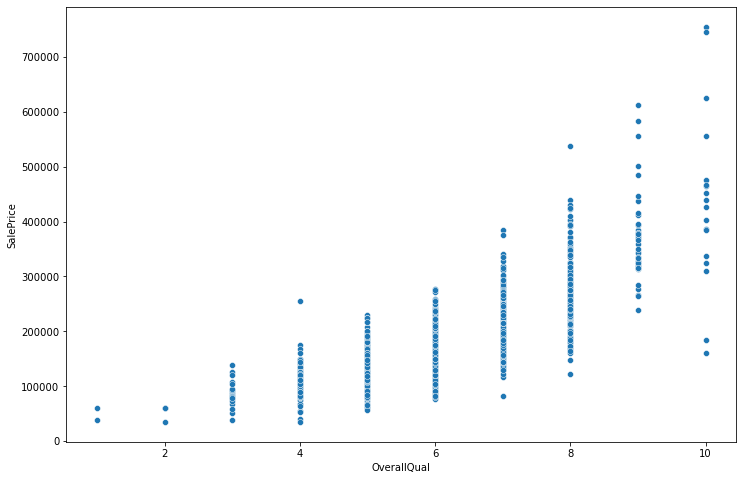

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='OverallQual' , y='SalePrice')

In [40]:
df[(df['OverallQual']>9) & (df['SalePrice']<200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750.0
1299,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000.0


In [41]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.331383
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

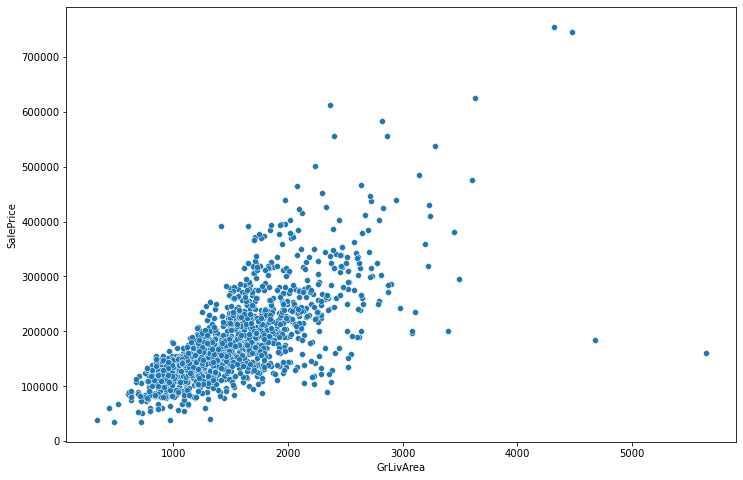

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='GrLivArea' , y='SalePrice')

In [43]:
df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750.0
1299,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000.0


In [44]:
# These two rows indicate themselves as clear outliers through EDA shown above.
df.drop([524,1299],axis=0,inplace=True)

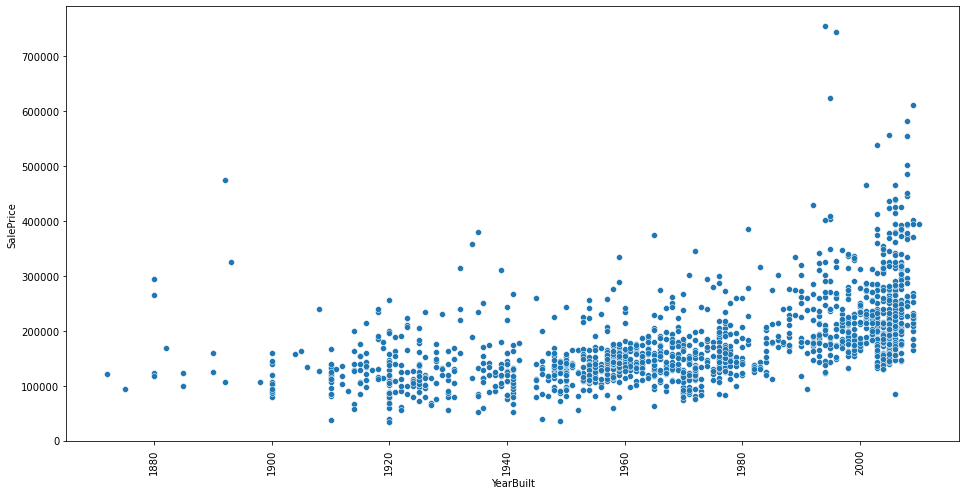

In [45]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice')
plt.xticks(rotation=90);

In [46]:
description()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

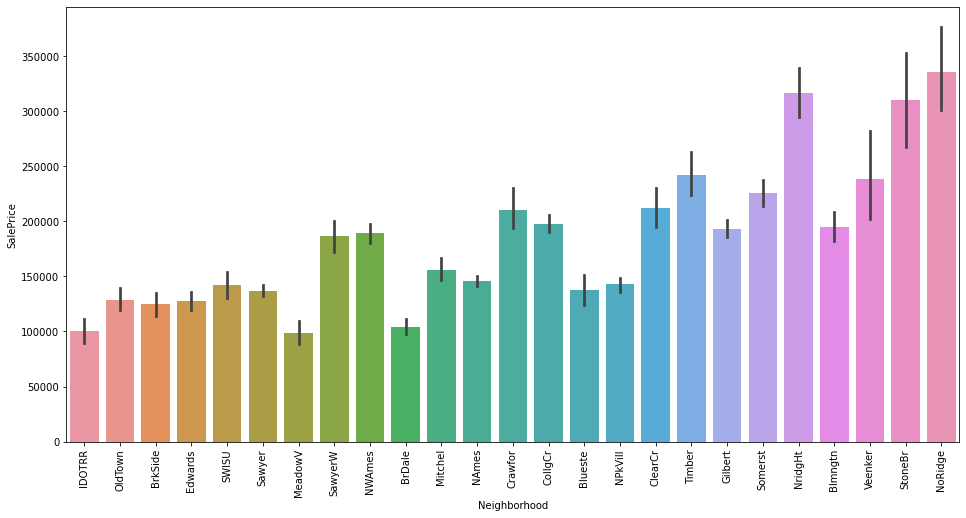

In [47]:
plt.figure(figsize=(16,8))
sns.barplot(data=df.sort_values(by='SalePrice'), x='Neighborhood',y='SalePrice')
plt.xticks(rotation=90);

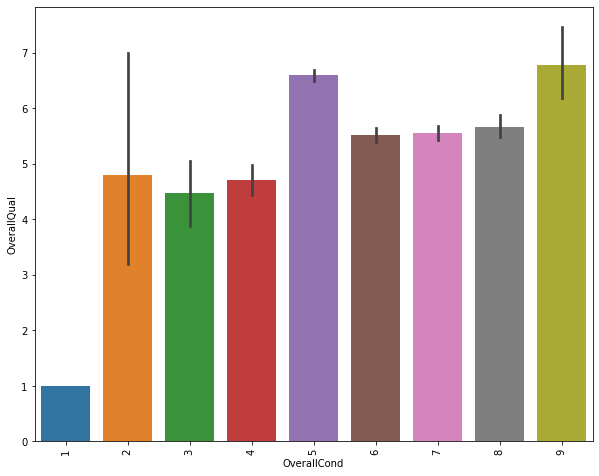

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='OverallCond',y='OverallQual')
plt.xticks(rotation=90);

In [49]:
from scipy.stats import chi2_contingency

# Create a contingency table of observed counts
contingency_table = pd.crosstab(df['YrSold'], df['SalePrice'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(p)


0.3695573461969608


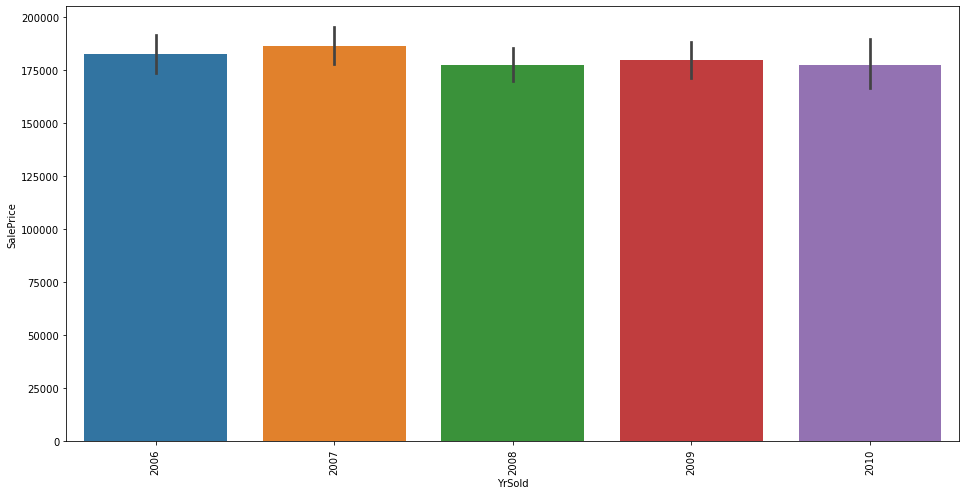

In [50]:
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='YrSold',y='SalePrice')
plt.xticks(rotation=90);

In [51]:
df.groupby('YrSold').describe()['SalePrice']

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
2007,328.0,186067.155488,85899.184505,39300.0,129800.0,166000.0,219500.0,755000.0
2008,303.0,177418.135314,69843.803786,40000.0,131000.0,165000.0,207000.0,446261.0
2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


In [52]:
df.corr()['SalePrice'].sort_values(ascending=False).head(10).index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
       '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [53]:
highly_corr = df[['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
       '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]

In [54]:
#plt.figure(figsize=(16,8))
#sns.pairplot(highly_corr)

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

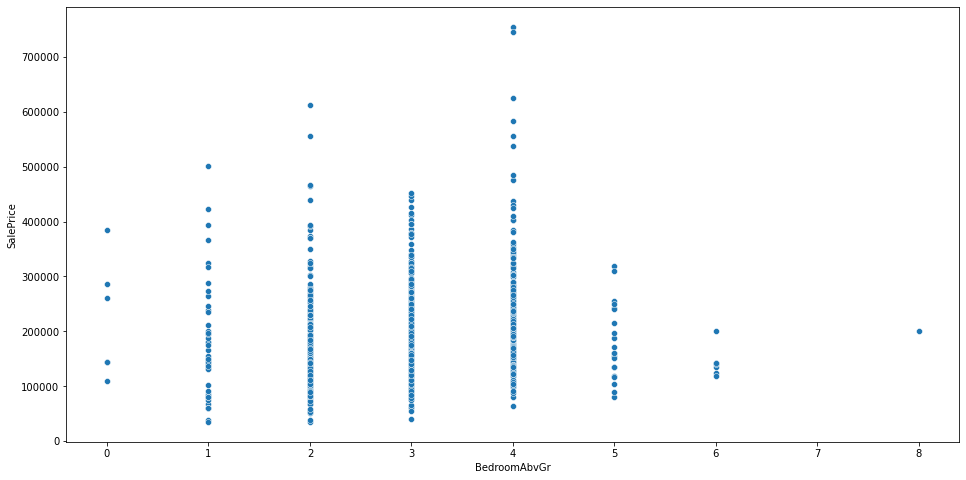

In [55]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='BedroomAbvGr',y='SalePrice')

In [56]:
description()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [57]:
# Import the value_counts method
from pandas import value_counts

# Set a threshold for imbalanced columns
threshold = 0.9

# Create an empty list to store the highly imbalanced features
highly_features = []

# Iterate over the columns in the DataFrame
for col in df.columns:
    # Get the value counts for the column
    counts = df[col].value_counts(normalize=True)
    
    # Check if the maximum value count is above the threshold
    if counts.max() > threshold:
        # If it is, add the column to the list of highly imbalanced features
        highly_features.append(col)

# Print the list of highly imbalanced features
print(highly_features)


['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [58]:
# THE ABOVE FEATURES ARE HIGHLY IMBALANCED, HENCE REMVING THEM FROM BOTH TRAIN AND TEST DATA
df = df.drop(['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating',
              'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
              'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis=1)


test = test.drop(['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir',
                  'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond',
                  'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis=1)

In [59]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,548.0,TA,0,61,0,2,2008,WD,Normal,208500.0
2,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,460.0,TA,298,0,0,5,2007,WD,Normal,181500.0
3,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,608.0,TA,0,42,0,9,2008,WD,Normal,223500.0
4,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,642.0,TA,0,35,272,2,2006,WD,Abnorml,140000.0
5,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,836.0,TA,192,84,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,Norm,...,460.0,TA,0,40,0,8,2007,WD,Normal,175000.0
1457,1457,20,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,Norm,...,500.0,TA,349,0,0,2,2010,WD,Normal,210000.0
1458,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,Norm,...,252.0,TA,0,60,0,5,2010,WD,Normal,266500.0


In [60]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

<AxesSubplot:>

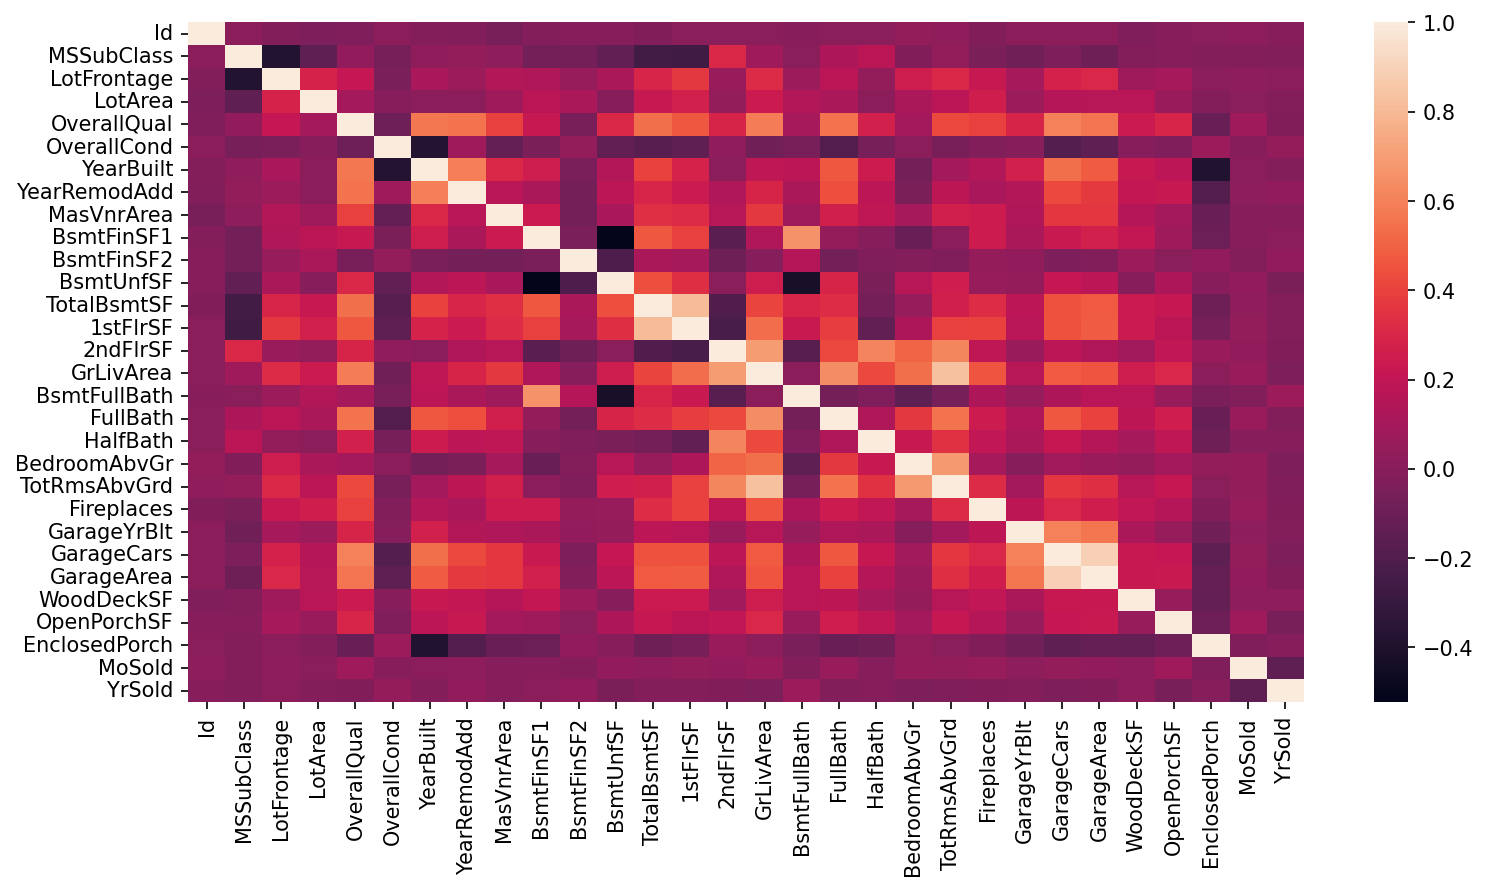

In [61]:
plt.figure(figsize=(12,6),dpi=150)
sns.heatmap(df.drop('SalePrice',axis=1).corr())

In [62]:
import pandas as pd

# Compute the pairwise correlations between the features
correlations = df.drop(columns='SalePrice').corr()

# Create a list of the feature names
feature_names = list(correlations.columns)

# Create an empty list to store the correlated feature pairs
correlated_pairs = []

# Iterate over the feature names
for i, feature_i in enumerate(feature_names):
    # Get the correlations with the other features
    corrs_with_feature_i = correlations[feature_i]
    
    # Iterate over the other feature names
    for j, feature_j in enumerate(feature_names):
        # Skip the feature itself
        if i == j:
            continue
            
        # Check if the correlation between the two features is above a threshold
        if abs(corrs_with_feature_i[j]) > 0.8:
            # If it is, add the feature pair to the list of correlated pairs
            correlated_pairs.append((feature_i, feature_j))

# Print the list of correlated pairs
print(correlated_pairs)


[('TotalBsmtSF', '1stFlrSF'), ('1stFlrSF', 'TotalBsmtSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('TotRmsAbvGrd', 'GrLivArea'), ('GarageCars', 'GarageArea'), ('GarageArea', 'GarageCars')]


In [63]:
# ABOVE CODE SHOWS THE FEATURES THAT ARE HIGHLY CORRELATED EXCLUDING THE TARGET, HENCE WE CAN USE ONE OF THEM IN THE PAIRS.
df = df.drop(['1stFlrSF','TotRmsAbvGrd','GarageCars'],axis=1)
test = test.drop(['1stFlrSF','TotRmsAbvGrd','GarageCars'],axis=1)

In [64]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,548.0,TA,0,61,0,2,2008,WD,Normal,208500.0
2,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,460.0,TA,298,0,0,5,2007,WD,Normal,181500.0
3,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,608.0,TA,0,42,0,9,2008,WD,Normal,223500.0
4,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,642.0,TA,0,35,272,2,2006,WD,Abnorml,140000.0
5,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,836.0,TA,192,84,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,Norm,...,460.0,TA,0,40,0,8,2007,WD,Normal,175000.0
1457,1457,20,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,Norm,...,500.0,TA,349,0,0,2,2010,WD,Normal,210000.0
1458,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,Norm,...,252.0,TA,0,60,0,5,2010,WD,Normal,266500.0


In [65]:
def separate_features(df):
    # Create an empty list for numerical features
    numerical_features = []
    
    # Create an empty list for categorical features
    categorical_features = []
    
    # Iterate over the columns in the DataFrame
    for col in df.columns:
        # Check if the column is numeric
        if df[col].dtype in ['int64', 'float64']:
            # If it is, add it to the list of numerical features
            numerical_features.append(col)
        else:
            # If it is not, add it to the list of categorical features
            categorical_features.append(col)
    
    # Return the lists of numerical and categorical features
    return numerical_features, categorical_features


In [66]:
separate_features(df)

(['Id',
  'MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '2ndFlrSF',
  'GrLivArea',
  'BsmtFullBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'Fireplaces',
  'GarageYrBlt',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  'MoSold',
  'YrSold',
  'SalePrice'],
 ['MSZoning',
  'LotShape',
  'LandContour',
  'LotConfig',
  'Neighborhood',
  'Condition1',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'HeatingQC',
  'KitchenQual',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'SaleType',
  'SaleCondition'])

In [67]:

df['MSZoning'].value_counts()

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [68]:
description()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [69]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,548.0,TA,0,61,0,2,2008,WD,Normal,208500.0
2,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,460.0,TA,298,0,0,5,2007,WD,Normal,181500.0
3,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,608.0,TA,0,42,0,9,2008,WD,Normal,223500.0
4,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,642.0,TA,0,35,272,2,2006,WD,Abnorml,140000.0
5,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,836.0,TA,192,84,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,Norm,...,460.0,TA,0,40,0,8,2007,WD,Normal,175000.0
1457,1457,20,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,Norm,...,500.0,TA,349,0,0,2,2010,WD,Normal,210000.0
1458,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,Norm,...,252.0,TA,0,60,0,5,2010,WD,Normal,266500.0


In [70]:
# Select the categorical feature to encode
feature = 'MSZoning'

# Group the DataFrame by the feature and compute the mean of the target value for each category
mean_encoding = df.groupby(feature)['SalePrice'].transform('mean')

# Map the mean of the target value for each category to the feature


In [71]:
from scipy.stats import f_oneway

# Get list of categorical features
cat_features = df.select_dtypes(include='object').columns

# Perform ANOVA for each categorical feature
for feature in cat_features:
    # Get list of unique values for the feature
    unique_values = df[feature].unique()
    
    # Perform ANOVA
    f_val, p_val = f_oneway(df[df[feature] == unique_values[0]]['SalePrice'],
                             df[df[feature] == unique_values[1]]['SalePrice'],
                             df[df[feature] == unique_values[2]]['SalePrice'])
    print(f"Feature: {feature} - P-value: {p_val}")



Feature: MSZoning - P-value: 9.152842125158715e-32
Feature: LotShape - P-value: 1.9459197554260872e-25
Feature: LandContour - P-value: 0.00015180645192842558
Feature: LotConfig - P-value: 0.6729112894717775
Feature: Neighborhood - P-value: 0.043289189109895716
Feature: Condition1 - P-value: 4.7097473010899155e-06
Feature: BldgType - P-value: 2.7677093131236684e-08
Feature: HouseStyle - P-value: 2.1665807120936626e-21
Feature: RoofStyle - P-value: 2.6742013452421793e-19
Feature: Exterior1st - P-value: 3.393607567489681e-36
Feature: Exterior2nd - P-value: 8.365069698976926e-25
Feature: MasVnrType - P-value: 2.2370093481339585e-64
Feature: ExterQual - P-value: 1.9112326676857876e-205
Feature: ExterCond - P-value: 7.277620151339054e-08
Feature: Foundation - P-value: 1.2053084773281062e-88
Feature: BsmtQual - P-value: 5.633443809269844e-181
Feature: BsmtCond - P-value: 1.465974915674353e-10
Feature: BsmtExposure - P-value: 9.064193431711839e-42
Feature: BsmtFinType1 - P-value: 7.67312770509

In [72]:
# Get list of categorical features
cat_features = df.select_dtypes(include='object').columns

# Loop through each categorical feature
for feature in cat_features:
    # Calculate mean target value for each category of the feature
    mean_target_by_feature = df.groupby(feature)['SalePrice'].mean()
    
    # Calculate overall mean target value
    mean_target = df['SalePrice'].mean()
    
    # Print difference between mean target value for each category and overall mean target value
    print(f"Feature: {feature}")
    print(mean_target_by_feature - mean_target)
    print('\n')


Feature: MSZoning
MSZoning
C (all)   -106404.919067
FV          33081.142471
RH         -49374.544067
RL          10104.503909
RM         -54616.088792
Name: SalePrice, dtype: float64


Feature: LotShape
LotShape
IR1    25212.952568
IR2    58900.446786
IR3    41329.858711
Reg   -16178.100689
Name: SalePrice, dtype: float64


Feature: LandContour
LandContour
Bnk   -38788.542018
HLS    50601.020933
Low    22728.192044
Lvl     -749.172309
Name: SalePrice, dtype: float64


Feature: LotConfig
LotConfig
Corner       773.038948
CulDSac    42921.697954
FR2        -2998.344599
FR3        27542.080933
Inside     -4002.304415
Name: SalePrice, dtype: float64


Feature: Neighborhood
Neighborhood
Blmngtn     13937.963286
Blueste    -43432.919067
BrDale     -76439.169067
BrkSide    -56098.867343
ClearCr     31632.509504
CollgCr     17032.854266
Crawfor     29691.806423
Edwards    -53614.347639
Gilbert     11921.587262
IDOTRR     -80809.135283
MeadowV    -82356.448479
Mitchel    -24662.796618
NAmes   

In [73]:
from numpy import std

# Get list of categorical features
cat_features = df.select_dtypes(include='object').columns

# Loop through each categorical feature
for feature in cat_features:
    # Calculate mean target value for each category of the feature
    mean_target_by_feature = df.groupby(feature)['SalePrice'].mean()
    
    # Calculate overall mean target value
    mean_target = df['SalePrice'].mean()
    
    # Calculate standard deviation of differences
    std_diff = std(mean_target_by_feature - mean_target)
    
    # Print standard deviation of differences
    print(f"Feature: {feature} - Standard deviation of differences: {std_diff}")
    print('\n')


Feature: MSZoning - Standard deviation of differences: 49693.86691011895


Feature: LotShape - Standard deviation of differences: 27794.446916878267


Feature: LandContour - Standard deviation of differences: 32774.53256268805


Feature: LotConfig - Standard deviation of differences: 18979.923079810607


Feature: Neighborhood - Standard deviation of differences: 65408.040030633914


Feature: Condition1 - Standard deviation of differences: 33046.59220085248


Feature: BldgType - Standard deviation of differences: 25249.58755366536


Feature: HouseStyle - Standard deviation of differences: 34703.64756605037


Feature: RoofStyle - Standard deviation of differences: 26520.908561432447


Feature: Exterior1st - Standard deviation of differences: 55801.733670359725


Feature: Exterior2nd - Standard deviation of differences: 53840.50384746671


Feature: MasVnrType - Standard deviation of differences: 47691.615033825605


Feature: ExterQual - Standard deviation of differences: 108333.3329782343

In [74]:
df.groupby('SaleCondition').mean()['SalePrice']

SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    273916.414634
Name: SalePrice, dtype: float64

In [75]:
df.groupby('LotShape').mean()['SalePrice']

LotShape
IR1    206145.871636
IR2    239833.365854
IR3    222262.777778
Reg    164754.818378
Name: SalePrice, dtype: float64

In [76]:
df.groupby('ExterQual').mean()['SalePrice']

ExterQual
Ex    375160.400000
Fa     87985.214286
Gd    231633.510246
TA    144341.313466
Name: SalePrice, dtype: float64

In [77]:
num_feat = df[['Id',
  'MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '2ndFlrSF',
  'GrLivArea',
  'BsmtFullBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'Fireplaces',
  'GarageYrBlt',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  'MoSold',
  'YrSold',
  'SalePrice']]

In [78]:
df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    48
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

In [79]:
description()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [80]:
num_that_are_cat = df[['MSSubClass','YearBuilt','YearRemodAdd','YrSold','MoSold','GarageYrBlt']]

In [81]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,548.0,TA,0,61,0,2,2008,WD,Normal,208500.0
2,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,460.0,TA,298,0,0,5,2007,WD,Normal,181500.0
3,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,608.0,TA,0,42,0,9,2008,WD,Normal,223500.0
4,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,642.0,TA,0,35,272,2,2006,WD,Abnorml,140000.0
5,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,836.0,TA,192,84,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,Norm,...,460.0,TA,0,40,0,8,2007,WD,Normal,175000.0
1457,1457,20,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,Norm,...,500.0,TA,349,0,0,2,2010,WD,Normal,210000.0
1458,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,Norm,...,252.0,TA,0,60,0,5,2010,WD,Normal,266500.0


In [82]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,1461,20,RH,80.0,11622,Reg,Lvl,Inside,NAmes,Feedr,...,730.0,TA,140,0,0,6,2010,WD,Normal,NaN
1462,1462,20,RL,81.0,14267,IR1,Lvl,Corner,NAmes,Norm,...,312.0,TA,393,36,0,6,2010,WD,Normal,NaN
1463,1463,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,...,482.0,TA,212,34,0,3,2010,WD,Normal,NaN
1464,1464,60,RL,78.0,9978,IR1,Lvl,Inside,Gilbert,Norm,...,470.0,TA,360,36,0,6,2010,WD,Normal,NaN
1465,1465,120,RL,43.0,5005,IR1,HLS,Inside,StoneBr,Norm,...,506.0,TA,0,82,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2915,160,RM,21.0,1936,Reg,Lvl,Inside,MeadowV,Norm,...,0.0,NA,0,0,0,6,2006,WD,Normal,NaN
2916,2916,160,RM,21.0,1894,Reg,Lvl,Inside,MeadowV,Norm,...,286.0,TA,0,24,0,4,2006,WD,Abnorml,NaN
2917,2917,20,RL,160.0,20000,Reg,Lvl,Inside,Mitchel,Norm,...,576.0,TA,474,0,0,9,2006,WD,Abnorml,NaN


In [83]:
cat_features

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'SaleType', 'SaleCondition'],
      dtype='object')

In [84]:
df['YearBuilt'].describe()

count    1458.000000
mean     1971.218107
std        30.193754
min      1872.000000
25%      1954.000000
50%      1972.500000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [85]:
df['YrSold'].describe()

count    1458.000000
mean     2007.816187
std         1.328826
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

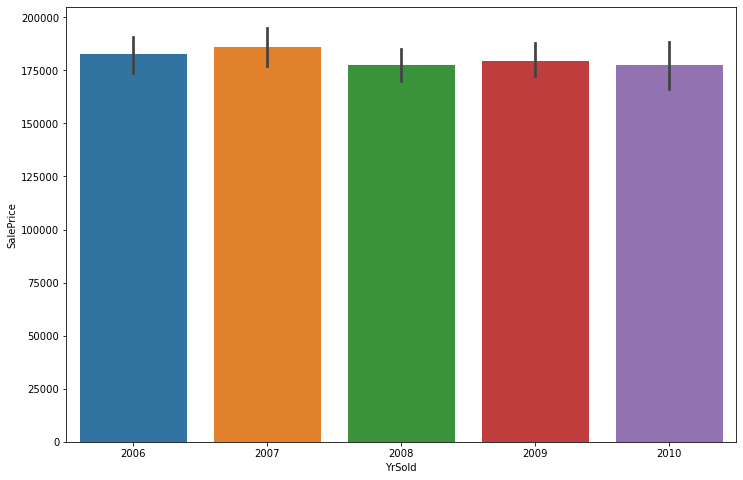

In [86]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x='YrSold',y='SalePrice')

In [87]:
df['SalePrice'].corr(df['YrSold'])

-0.028881938508144304

In [88]:
df.corr()['SalePrice'].sort_values()

EnclosedPorch   -0.128646
MSSubClass      -0.084276
OverallCond     -0.077948
YrSold          -0.028882
Id              -0.021673
BsmtFinSF2      -0.011422
MoSold           0.046124
BedroomAbvGr     0.168245
BsmtUnfSF        0.214460
BsmtFullBath     0.228459
GarageYrBlt      0.261435
LotArea          0.268179
HalfBath         0.284590
2ndFlrSF         0.320532
OpenPorchSF      0.321142
WoodDeckSF       0.324758
LotFrontage      0.348738
BsmtFinSF1       0.409384
Fireplaces       0.469862
MasVnrArea       0.477810
YearRemodAdd     0.507717
YearBuilt        0.523608
FullBath         0.562165
GarageArea       0.629217
TotalBsmtSF      0.651153
GrLivArea        0.734968
OverallQual      0.795774
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [89]:
df.groupby('GarageYrBlt').count()['SalePrice']

GarageYrBlt
0.0       81
1900.0     1
1906.0     1
1908.0     1
1910.0     3
          ..
2006.0    59
2007.0    48
2008.0    28
2009.0    21
2010.0     3
Name: SalePrice, Length: 98, dtype: int64

In [90]:
cat_features 

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'SaleType', 'SaleCondition'],
      dtype='object')

In [91]:
count_encoding_feat = ['GarageYrBlt','MoSold','Neighborhood','MSSubClass']

In [92]:
df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    48
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

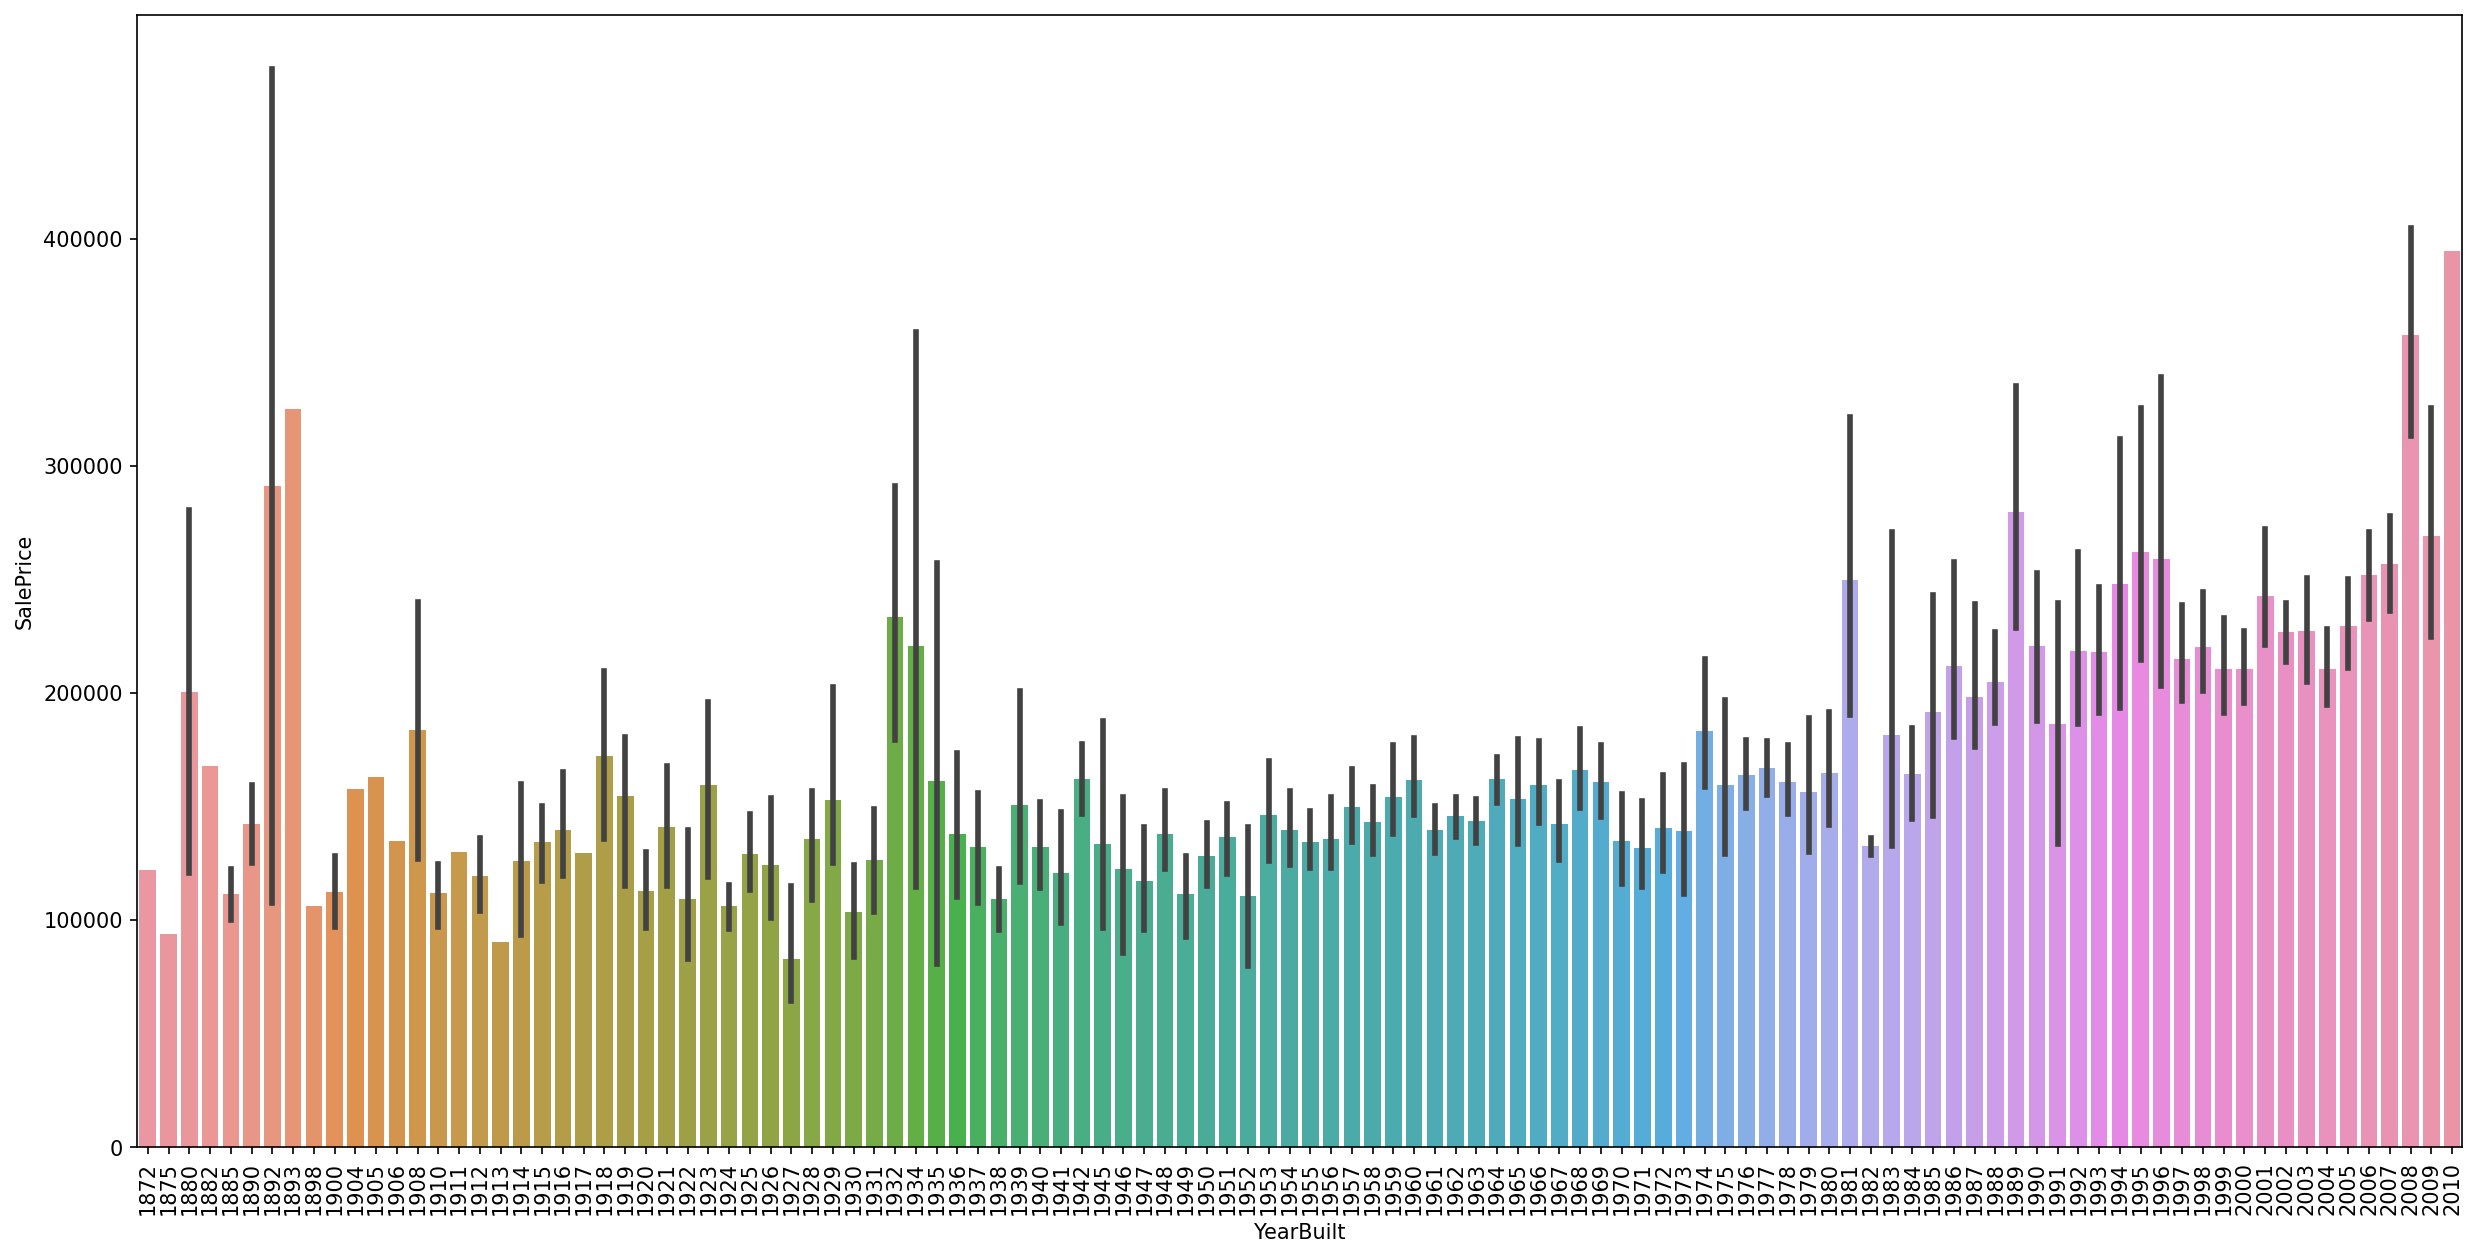

In [93]:
#
plt.figure(figsize=(20,10),dpi=150)
sns.barplot(data=df,x='YearBuilt',y='SalePrice')
plt.xticks(rotation=90)

In [94]:
# Create bins for decades
decade_bins = range(1870,2030,10)
decade_labels = [f'{i}s' for i in range(1870,2020,10)]

# Create a new column 'decade' and group the 'year' feature into decades
df['yearbuilt-decade'] = pd.cut(df['YearBuilt'], bins=decade_bins, labels=decade_labels, right=False)




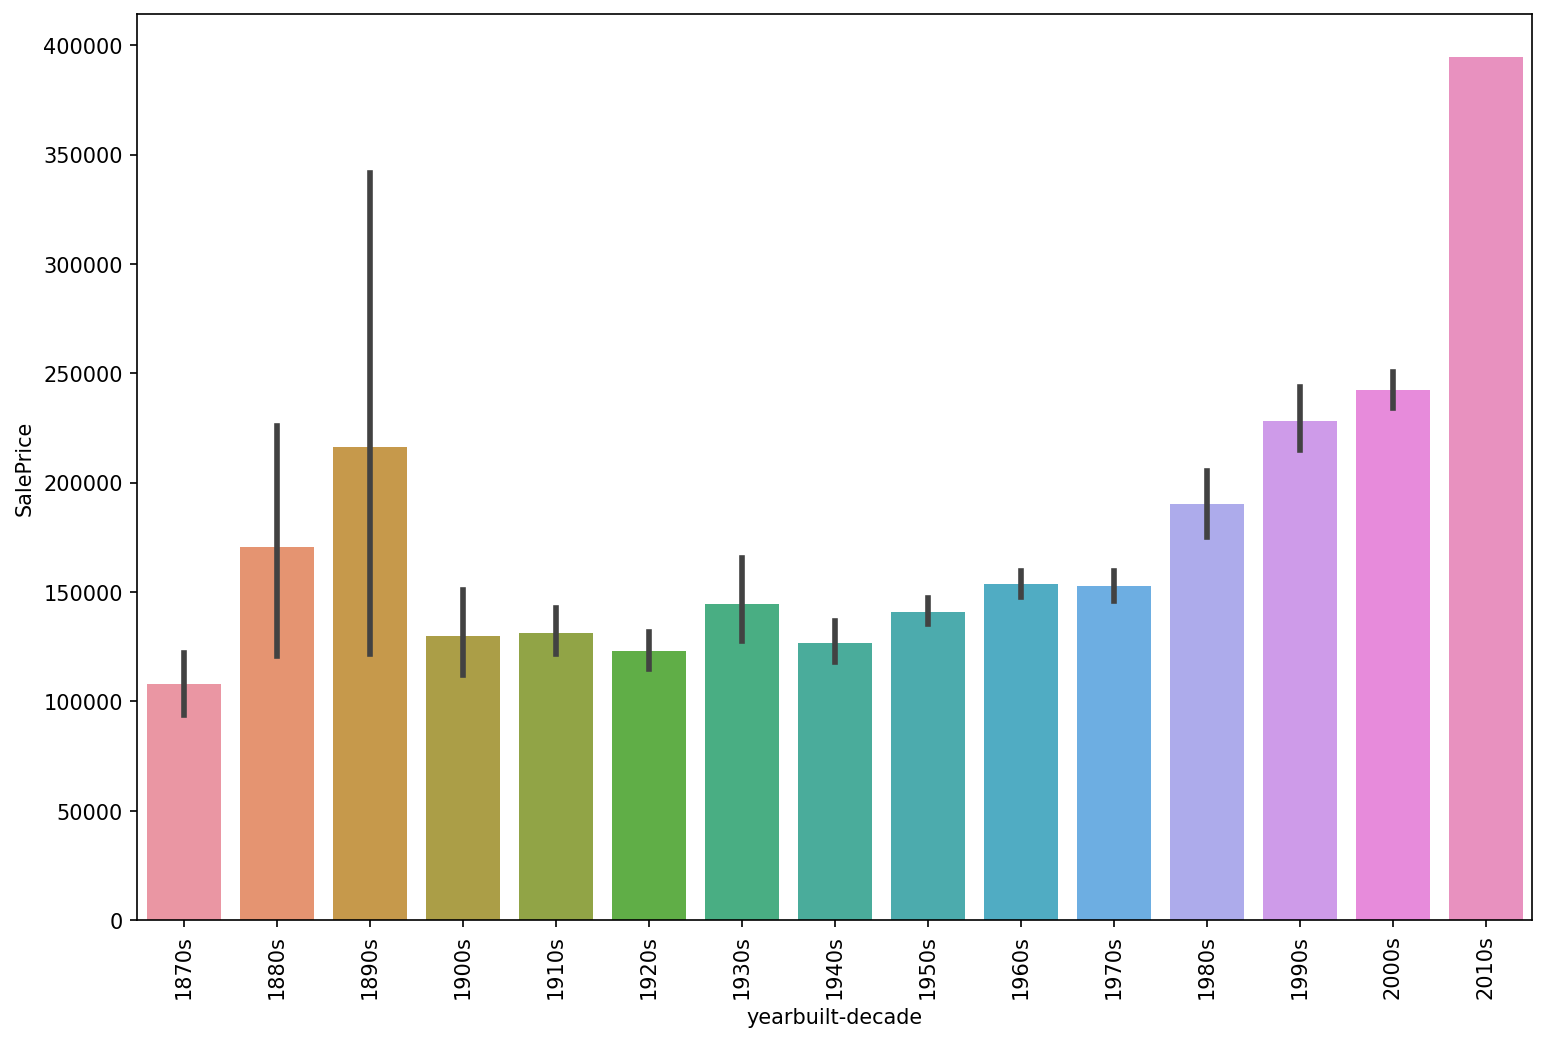

In [95]:
plt.figure(figsize=(12,8),dpi=150)
sns.barplot(data=df,x='yearbuilt-decade',y='SalePrice')
plt.xticks(rotation=90);

In [96]:
decade_bins = range(1870,2030,10)
decade_labels = [f'{i}s' for i in range(1870,2020,10)]

# Create a new column 'decade' and group the 'year' feature into decades
test['yearbuilt-decade'] = pd.cut(test['YearBuilt'], bins=decade_bins, labels=decade_labels, right=False)


In [97]:
decade_bins = range(1950,2030,10)
decade_labels = [f'{i}s' for i in range(1950,2020,10)]

# Create a new column 'decade' and group the 'year' feature into decades
df['Yrremod-decade'] = pd.cut(df['YearRemodAdd'], bins=decade_bins, labels=decade_labels, right=False)


In [98]:
decade_bins = range(1950,2030,10)
decade_labels = [f'{i}s' for i in range(1950,2020,10)]

# Create a new column 'decade' and group the 'year' feature into decades
test['Yrremod-decade'] = pd.cut(test['YearRemodAdd'], bins=decade_bins, labels=decade_labels, right=False)


In [99]:
df[df['yearbuilt-decade'].isnull()]['YearBuilt']

Series([], Name: YearBuilt, dtype: int64)

In [100]:
#df = df.drop('decade',axis=1)
#test = test.drop('decade',axis=1)

In [101]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,yearbuilt-decade,Yrremod-decade
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,0,61,0,2,2008,WD,Normal,208500.0,2000s,2000s
2,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,298,0,0,5,2007,WD,Normal,181500.0,1970s,1970s
3,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,0,42,0,9,2008,WD,Normal,223500.0,2000s,2000s
4,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,0,35,272,2,2006,WD,Abnorml,140000.0,1910s,1970s
5,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,192,84,0,12,2008,WD,Normal,250000.0,2000s,2000s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,Norm,...,0,40,0,8,2007,WD,Normal,175000.0,1990s,2000s
1457,1457,20,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,Norm,...,349,0,0,2,2010,WD,Normal,210000.0,1970s,1980s
1458,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,Norm,...,0,60,0,5,2010,WD,Normal,266500.0,1940s,2000s


In [102]:
separate_features(df)

(['Id',
  'MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '2ndFlrSF',
  'GrLivArea',
  'BsmtFullBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'Fireplaces',
  'GarageYrBlt',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  'MoSold',
  'YrSold',
  'SalePrice'],
 ['MSZoning',
  'LotShape',
  'LandContour',
  'LotConfig',
  'Neighborhood',
  'Condition1',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'HeatingQC',
  'KitchenQual',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'SaleType',
  'SaleCondition',
  'yearbuilt-decade',
  'Yrremod-decade'])

In [103]:
categorical_features = ['MSZoning','LotShape','LandContour',
  'LotConfig',
  'Neighborhood',
  'Condition1','BldgType',
  'HouseStyle',
  'RoofStyle',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'HeatingQC',
  'KitchenQual',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'SaleType',
  'SaleCondition',
  'yearbuilt-decade',
  'Yrremod-decade']

In [104]:
categorical_features

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'SaleType',
 'SaleCondition',
 'yearbuilt-decade',
 'Yrremod-decade']

In [105]:

for f in categorical_features:
    count_encod_features = []
    if len(df[f].value_counts()) > 7:
        count_encod_features.append(f)
        
        print(count_encod_features)

['Neighborhood']
['Condition1']
['HouseStyle']
['Exterior1st']
['Exterior2nd']
['SaleType']
['yearbuilt-decade']


In [106]:
count_encod_features = ['Neighborhood','Condition1','HouseStyle','Exterior1st','Exterior2nd','SaleType',
                         'yearbuilt-decade','Yrremod-decade']

In [107]:
df.corr()['SalePrice'].sort_values().head(5).index

Index(['EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'Id'], dtype='object')

In [108]:
col_with_low_corr = ['EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',]


In [109]:
df = df.drop(['EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',],axis=1)
test = test.drop(['EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold'],axis=1)

In [110]:
# DROPPING YEAR BUILT AND YEAR-REMOD AS THEY HAVE BEEN GROUPED INTO NEW FEATURES
df = df.drop(['YearRemodAdd','YearBuilt'],axis=1)
test = test.drop(['YearRemodAdd','YearBuilt'],axis=1)

In [111]:
for feature in count_encod_features:
    count_map = df[feature].value_counts().to_dict()
    df[feature] = df[feature].map(count_map)

In [112]:
for feature in count_encod_features:
    count_map = test[feature].value_counts().to_dict()
    test[feature] = test[feature].map(count_map)

In [113]:
# convert the features to integers
for feature in count_encod_features:
    df[feature] = pd.to_numeric(df[feature])


In [114]:
# convert the features to integers
for feature in count_encod_features:
    test[feature] = pd.to_numeric(test[feature])


In [115]:
separate_features(df)

(['Id',
  'LotFrontage',
  'LotArea',
  'Neighborhood',
  'Condition1',
  'HouseStyle',
  'OverallQual',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '2ndFlrSF',
  'GrLivArea',
  'BsmtFullBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'Fireplaces',
  'GarageYrBlt',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'MoSold',
  'SaleType',
  'SalePrice',
  'yearbuilt-decade',
  'Yrremod-decade'],
 ['MSZoning',
  'LotShape',
  'LandContour',
  'LotConfig',
  'BldgType',
  'RoofStyle',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'HeatingQC',
  'KitchenQual',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'SaleCondition'])

In [116]:
dummy_cols = ['MSZoning',
  'LotShape',
  'LandContour',
  'LotConfig',
  'BldgType',
  'RoofStyle',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'HeatingQC',
  'KitchenQual',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'SaleCondition']

In [117]:
df = pd.get_dummies(df,columns=dummy_cols)

In [118]:
test = pd.get_dummies(test,columns=dummy_cols)

In [119]:
df

,Id,LotFrontage,LotArea,Neighborhood,Condition1,HouseStyle,OverallQual,Exterior1st,Exterior2nd,MasVnrArea,...,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,1,65.0,8450,150,1260,443,7,515,504,196.0,...,0,0,0,1,0,0,0,0,1,0
2,2,80.0,9600,11,80,726,6,220,214,0.0,...,0,0,0,1,0,0,0,0,1,0
3,3,68.0,11250,150,1260,443,7,515,504,162.0,...,0,0,0,1,0,0,0,0,1,0
4,4,60.0,9550,51,1260,443,7,206,38,0.0,...,0,0,0,1,1,0,0,0,0,0
5,5,84.0,14260,41,1260,443,8,515,504,350.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,62.0,7917,79,1260,443,6,515,504,0.0,...,0,0,0,1,0,0,0,0,1,0
1457,1457,85.0,13175,73,1260,726,6,108,142,119.0,...,0,0,0,1,0,0,0,0,1,0
1458,1458,66.0,9042,51,1260,443,7,60,59,0.0,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

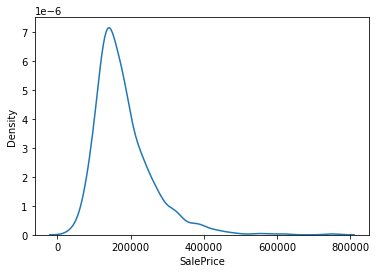

In [120]:
sns.kdeplot(data=df['SalePrice'])

In [121]:
df[df['SalePrice']>500000].index

Int64Index([179, 441, 692, 770, 804, 899, 1047, 1170, 1183], dtype='int64', name='Id')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

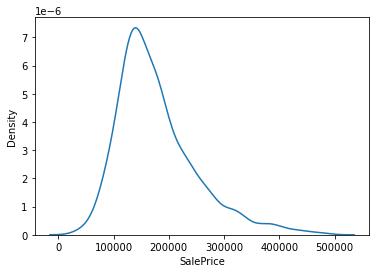

In [122]:
sns.kdeplot(data=df.drop([179, 441, 692, 770, 804, 899, 1047, 1170, 1183],axis=0)['SalePrice'])

In [123]:
df = df.drop([179, 441, 692, 770, 804, 899, 1047, 1170, 1183],axis=0)

In [124]:
df = df.drop('Id',axis=1)
test = test.drop('Id',axis=1)

In [125]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [126]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [127]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [129]:
scaler = StandardScaler()
LR = LinearRegression()
svr = SVR()
dec_tree = DecisionTreeRegressor()
RFR = RandomForestRegressor()
GBR = GradientBoostingRegressor()
xgb = XGBRegressor()
light = LGBMRegressor()
cat = CatBoostRegressor()

In [130]:
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)

In [131]:
models = [LR,svr,dec_tree,RFR,GBR,xgb,light]

In [132]:
def scaled_func(model):
    model.fit(Scaled_X_train,y_train)
    
    preds = model.predict(Scaled_X_test)
    
    mse = mean_squared_error(y_test,preds)
    rmse = mse**0.5
    
    return mse, rmse

In [133]:
scaled_func(LR)

(5.6670254121703685e+29, 752796480608827.5)

In [134]:
scaled_func(svr)

(5200204843.973981, 72112.44583269923)

In [135]:
scaled_func(dec_tree)

(1279760575.724138, 35773.74142753506)

In [136]:
scaled_func(RFR)

(611266828.255431, 24723.810957363166)

In [137]:
scaled_func(GBR)

(520298878.1111042, 22810.060896698724)

In [138]:
scaled_func(xgb)

(705591399.9193387, 26562.970464903556)

In [139]:
scaled_func(light)

(519870731.1043001, 22800.67391776612)

In [140]:
scaled_func(cat)

Learning rate set to 0.041033
0:	learn: 70270.1738420	total: 175ms	remaining: 2m 54s
1:	learn: 68549.2037062	total: 186ms	remaining: 1m 32s
2:	learn: 66786.2779737	total: 201ms	remaining: 1m 6s
3:	learn: 65023.0050443	total: 208ms	remaining: 51.7s
4:	learn: 63596.8488089	total: 215ms	remaining: 42.8s
5:	learn: 61873.9775896	total: 222ms	remaining: 36.7s
6:	learn: 60365.3554016	total: 230ms	remaining: 32.6s
7:	learn: 58848.9168804	total: 236ms	remaining: 29.3s
8:	learn: 57401.0668687	total: 242ms	remaining: 26.6s
9:	learn: 56135.3353390	total: 249ms	remaining: 24.6s
10:	learn: 54760.8773850	total: 256ms	remaining: 23s
11:	learn: 53493.5712904	total: 263ms	remaining: 21.7s
12:	learn: 52317.9817290	total: 270ms	remaining: 20.5s
13:	learn: 51167.8764322	total: 277ms	remaining: 19.5s
14:	learn: 49987.3850675	total: 283ms	remaining: 18.6s
15:	learn: 49021.3538162	total: 291ms	remaining: 17.9s
16:	learn: 48030.6890559	total: 297ms	remaining: 17.2s
17:	learn: 46992.9154824	total: 304ms	remaini

162:	learn: 17524.3943594	total: 1.47s	remaining: 7.55s
163:	learn: 17493.6443903	total: 1.48s	remaining: 7.53s
164:	learn: 17457.1382710	total: 1.49s	remaining: 7.51s
165:	learn: 17429.9021606	total: 1.49s	remaining: 7.49s
166:	learn: 17376.6388937	total: 1.5s	remaining: 7.47s
167:	learn: 17342.2537518	total: 1.5s	remaining: 7.45s
168:	learn: 17315.7029552	total: 1.51s	remaining: 7.43s
169:	learn: 17291.6398286	total: 1.52s	remaining: 7.41s
170:	learn: 17255.0253464	total: 1.52s	remaining: 7.39s
171:	learn: 17210.7579315	total: 1.53s	remaining: 7.36s
172:	learn: 17185.4692228	total: 1.54s	remaining: 7.34s
173:	learn: 17142.1785713	total: 1.54s	remaining: 7.33s
174:	learn: 17108.5694038	total: 1.55s	remaining: 7.31s
175:	learn: 17073.1656614	total: 1.56s	remaining: 7.29s
176:	learn: 17054.9112739	total: 1.56s	remaining: 7.27s
177:	learn: 17004.7035681	total: 1.57s	remaining: 7.25s
178:	learn: 16988.0770924	total: 1.58s	remaining: 7.24s
179:	learn: 16963.8944444	total: 1.58s	remaining: 

331:	learn: 13629.4509216	total: 2.73s	remaining: 5.49s
332:	learn: 13609.7694470	total: 2.73s	remaining: 5.48s
333:	learn: 13581.6212125	total: 2.74s	remaining: 5.47s
334:	learn: 13554.2289515	total: 2.76s	remaining: 5.47s
335:	learn: 13522.8805248	total: 2.76s	remaining: 5.46s
336:	learn: 13508.9590866	total: 2.77s	remaining: 5.45s
337:	learn: 13465.2193457	total: 2.78s	remaining: 5.44s
338:	learn: 13436.0786790	total: 2.78s	remaining: 5.43s
339:	learn: 13398.7891476	total: 2.79s	remaining: 5.42s
340:	learn: 13394.5383593	total: 2.81s	remaining: 5.42s
341:	learn: 13361.0142533	total: 2.81s	remaining: 5.42s
342:	learn: 13359.2548913	total: 2.82s	remaining: 5.41s
343:	learn: 13350.8708685	total: 2.83s	remaining: 5.41s
344:	learn: 13325.9765844	total: 2.85s	remaining: 5.4s
345:	learn: 13304.7629008	total: 2.85s	remaining: 5.39s
346:	learn: 13280.3186134	total: 2.86s	remaining: 5.39s
347:	learn: 13261.4673448	total: 2.87s	remaining: 5.37s
348:	learn: 13234.3165390	total: 2.88s	remaining:

490:	learn: 10788.7786021	total: 3.98s	remaining: 4.12s
491:	learn: 10771.4864928	total: 3.98s	remaining: 4.11s
492:	learn: 10767.6585123	total: 3.99s	remaining: 4.1s
493:	learn: 10750.0609166	total: 4s	remaining: 4.09s
494:	learn: 10736.0593761	total: 4s	remaining: 4.08s
495:	learn: 10717.8774795	total: 4.01s	remaining: 4.08s
496:	learn: 10711.6925708	total: 4.02s	remaining: 4.07s
497:	learn: 10694.8075308	total: 4.02s	remaining: 4.06s
498:	learn: 10684.1508673	total: 4.03s	remaining: 4.05s
499:	learn: 10674.7915752	total: 4.04s	remaining: 4.04s
500:	learn: 10657.0799316	total: 4.05s	remaining: 4.03s
501:	learn: 10638.5436699	total: 4.05s	remaining: 4.02s
502:	learn: 10628.4377155	total: 4.06s	remaining: 4.01s
503:	learn: 10621.4823229	total: 4.07s	remaining: 4s
504:	learn: 10613.8867528	total: 4.08s	remaining: 4s
505:	learn: 10601.4659176	total: 4.08s	remaining: 3.99s
506:	learn: 10589.6481096	total: 4.09s	remaining: 3.98s
507:	learn: 10567.5329787	total: 4.1s	remaining: 3.97s
508:	l

639:	learn: 8885.6683063	total: 5.03s	remaining: 2.83s
640:	learn: 8866.1371224	total: 5.04s	remaining: 2.82s
641:	learn: 8848.9109313	total: 5.05s	remaining: 2.81s
642:	learn: 8841.2231406	total: 5.05s	remaining: 2.81s
643:	learn: 8836.0987755	total: 5.06s	remaining: 2.8s
644:	learn: 8829.0775169	total: 5.07s	remaining: 2.79s
645:	learn: 8816.9785857	total: 5.07s	remaining: 2.78s
646:	learn: 8797.7845502	total: 5.08s	remaining: 2.77s
647:	learn: 8777.0031824	total: 5.09s	remaining: 2.76s
648:	learn: 8760.6784152	total: 5.09s	remaining: 2.75s
649:	learn: 8746.4738781	total: 5.1s	remaining: 2.75s
650:	learn: 8743.2221659	total: 5.11s	remaining: 2.74s
651:	learn: 8724.2945912	total: 5.11s	remaining: 2.73s
652:	learn: 8718.7782618	total: 5.12s	remaining: 2.72s
653:	learn: 8705.9070595	total: 5.13s	remaining: 2.71s
654:	learn: 8693.5869035	total: 5.13s	remaining: 2.71s
655:	learn: 8680.4932695	total: 5.14s	remaining: 2.7s
656:	learn: 8671.4323068	total: 5.15s	remaining: 2.69s
657:	learn: 8

805:	learn: 7087.9924380	total: 6.28s	remaining: 1.51s
806:	learn: 7080.5230203	total: 6.29s	remaining: 1.5s
807:	learn: 7074.0160863	total: 6.29s	remaining: 1.5s
808:	learn: 7064.9901922	total: 6.3s	remaining: 1.49s
809:	learn: 7054.7715484	total: 6.31s	remaining: 1.48s
810:	learn: 7044.7067342	total: 6.32s	remaining: 1.47s
811:	learn: 7037.9694664	total: 6.32s	remaining: 1.46s
812:	learn: 7024.3327525	total: 6.33s	remaining: 1.46s
813:	learn: 7017.1449124	total: 6.34s	remaining: 1.45s
814:	learn: 7006.4987074	total: 6.34s	remaining: 1.44s
815:	learn: 6996.5297938	total: 6.35s	remaining: 1.43s
816:	learn: 6981.6565784	total: 6.36s	remaining: 1.42s
817:	learn: 6973.5606720	total: 6.37s	remaining: 1.42s
818:	learn: 6959.5492351	total: 6.37s	remaining: 1.41s
819:	learn: 6950.1695678	total: 6.38s	remaining: 1.4s
820:	learn: 6934.4537351	total: 6.39s	remaining: 1.39s
821:	learn: 6924.1693675	total: 6.39s	remaining: 1.38s
822:	learn: 6915.6848129	total: 6.4s	remaining: 1.38s
823:	learn: 690

956:	learn: 5947.8679921	total: 7.36s	remaining: 331ms
957:	learn: 5941.7709508	total: 7.37s	remaining: 323ms
958:	learn: 5936.2694104	total: 7.37s	remaining: 315ms
959:	learn: 5931.9899203	total: 7.38s	remaining: 307ms
960:	learn: 5922.6473028	total: 7.38s	remaining: 300ms
961:	learn: 5916.1977191	total: 7.39s	remaining: 292ms
962:	learn: 5914.2959120	total: 7.4s	remaining: 284ms
963:	learn: 5910.3786966	total: 7.41s	remaining: 277ms
964:	learn: 5905.1934823	total: 7.41s	remaining: 269ms
965:	learn: 5893.0570910	total: 7.42s	remaining: 261ms
966:	learn: 5886.5098507	total: 7.43s	remaining: 253ms
967:	learn: 5880.4560237	total: 7.43s	remaining: 246ms
968:	learn: 5875.8207569	total: 7.44s	remaining: 238ms
969:	learn: 5871.1817800	total: 7.45s	remaining: 230ms
970:	learn: 5864.3217512	total: 7.45s	remaining: 223ms
971:	learn: 5857.8801939	total: 7.46s	remaining: 215ms
972:	learn: 5853.0767108	total: 7.47s	remaining: 207ms
973:	learn: 5848.4318786	total: 7.47s	remaining: 199ms
974:	learn:

(445898952.3283128, 21116.319573455807)

In [141]:
def func(model):
    model.fit(X_train,y_train)
    
    preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test,preds)
    rmse = mse**0.5
    
    return mse, rmse

In [142]:
func(LR)

(515870420.3560568, 22712.78099124052)

In [143]:
func(svr)

(5201061890.829917, 72118.38802157129)

In [144]:
func(dec_tree)

(1182627103.370115, 34389.34578281644)

In [145]:
func(RFR)

(598435723.0333247, 24462.94591894698)

In [146]:
func(GBR)

(514991698.8933264, 22693.428539851055)

In [147]:
func(xgb)

(705560322.4140981, 26562.385480489098)

In [148]:
func(light)

(528931252.2536899, 22998.50543521665)

In [149]:
func(cat)

Learning rate set to 0.041033
0:	learn: 70270.1738420	total: 8.21ms	remaining: 8.2s
1:	learn: 68549.2037062	total: 17.1ms	remaining: 8.53s
2:	learn: 66786.2779737	total: 24.6ms	remaining: 8.16s
3:	learn: 65023.0050443	total: 33.8ms	remaining: 8.41s
4:	learn: 63596.8488089	total: 40ms	remaining: 7.96s
5:	learn: 61873.9775896	total: 48.7ms	remaining: 8.06s
6:	learn: 60365.3554016	total: 55.5ms	remaining: 7.87s
7:	learn: 58848.9168804	total: 63.9ms	remaining: 7.92s
8:	learn: 57401.0668687	total: 70.5ms	remaining: 7.76s
9:	learn: 56135.3353390	total: 79.9ms	remaining: 7.91s
10:	learn: 54760.8773850	total: 87.2ms	remaining: 7.84s
11:	learn: 53493.5712904	total: 93.4ms	remaining: 7.69s
12:	learn: 52317.9817290	total: 101ms	remaining: 7.67s
13:	learn: 51167.8764322	total: 108ms	remaining: 7.63s
14:	learn: 49987.3850675	total: 116ms	remaining: 7.59s
15:	learn: 49021.3538162	total: 123ms	remaining: 7.56s
16:	learn: 48030.6890559	total: 130ms	remaining: 7.53s
17:	learn: 46992.9154824	total: 137m

161:	learn: 17560.2480848	total: 1.26s	remaining: 6.51s
162:	learn: 17524.3943594	total: 1.27s	remaining: 6.5s
163:	learn: 17493.6443903	total: 1.27s	remaining: 6.5s
164:	learn: 17457.1382710	total: 1.28s	remaining: 6.49s
165:	learn: 17429.9021606	total: 1.29s	remaining: 6.48s
166:	learn: 17376.6388937	total: 1.3s	remaining: 6.48s
167:	learn: 17342.2537518	total: 1.31s	remaining: 6.48s
168:	learn: 17315.7029552	total: 1.32s	remaining: 6.48s
169:	learn: 17291.6398286	total: 1.32s	remaining: 6.47s
170:	learn: 17255.0253464	total: 1.33s	remaining: 6.47s
171:	learn: 17210.7579315	total: 1.34s	remaining: 6.45s
172:	learn: 17185.4692228	total: 1.35s	remaining: 6.44s
173:	learn: 17142.1785713	total: 1.35s	remaining: 6.43s
174:	learn: 17108.5694038	total: 1.36s	remaining: 6.41s
175:	learn: 17073.1656614	total: 1.37s	remaining: 6.41s
176:	learn: 17054.9112739	total: 1.38s	remaining: 6.4s
177:	learn: 17004.7035681	total: 1.38s	remaining: 6.38s
178:	learn: 16988.0770924	total: 1.39s	remaining: 6.

309:	learn: 14036.1630547	total: 2.34s	remaining: 5.22s
310:	learn: 14024.9739734	total: 2.35s	remaining: 5.21s
311:	learn: 14022.6243768	total: 2.36s	remaining: 5.2s
312:	learn: 14020.4935459	total: 2.36s	remaining: 5.19s
313:	learn: 14018.2601109	total: 2.37s	remaining: 5.18s
314:	learn: 13973.7881264	total: 2.38s	remaining: 5.17s
315:	learn: 13946.4303001	total: 2.38s	remaining: 5.16s
316:	learn: 13937.7835643	total: 2.39s	remaining: 5.15s
317:	learn: 13908.3768521	total: 2.4s	remaining: 5.14s
318:	learn: 13869.5029410	total: 2.4s	remaining: 5.13s
319:	learn: 13837.8328963	total: 2.41s	remaining: 5.12s
320:	learn: 13804.6893686	total: 2.42s	remaining: 5.12s
321:	learn: 13788.6450565	total: 2.42s	remaining: 5.11s
322:	learn: 13786.4958222	total: 2.43s	remaining: 5.1s
323:	learn: 13776.5365747	total: 2.44s	remaining: 5.09s
324:	learn: 13758.8931561	total: 2.45s	remaining: 5.08s
325:	learn: 13743.9654134	total: 2.46s	remaining: 5.08s
326:	learn: 13714.2660316	total: 2.46s	remaining: 5.

468:	learn: 11162.6531209	total: 3.59s	remaining: 4.07s
469:	learn: 11156.0616532	total: 3.6s	remaining: 4.06s
470:	learn: 11127.7073250	total: 3.61s	remaining: 4.05s
471:	learn: 11097.9981226	total: 3.62s	remaining: 4.04s
472:	learn: 11075.1432521	total: 3.62s	remaining: 4.04s
473:	learn: 11060.4802350	total: 3.63s	remaining: 4.03s
474:	learn: 11052.3725151	total: 3.64s	remaining: 4.02s
475:	learn: 11040.6291235	total: 3.65s	remaining: 4.01s
476:	learn: 11017.9544328	total: 3.65s	remaining: 4s
477:	learn: 10996.6054839	total: 3.66s	remaining: 4s
478:	learn: 10976.3685920	total: 3.67s	remaining: 3.99s
479:	learn: 10958.9825355	total: 3.67s	remaining: 3.98s
480:	learn: 10946.6854737	total: 3.68s	remaining: 3.97s
481:	learn: 10931.5337534	total: 3.69s	remaining: 3.96s
482:	learn: 10927.8245224	total: 3.7s	remaining: 3.96s
483:	learn: 10911.6036501	total: 3.7s	remaining: 3.95s
484:	learn: 10894.4401403	total: 3.71s	remaining: 3.94s
485:	learn: 10878.3707469	total: 3.72s	remaining: 3.93s
4

622:	learn: 9088.1663436	total: 4.7s	remaining: 2.84s
623:	learn: 9078.9964262	total: 4.71s	remaining: 2.83s
624:	learn: 9063.5994284	total: 4.71s	remaining: 2.83s
625:	learn: 9048.0863787	total: 4.72s	remaining: 2.82s
626:	learn: 9040.0951101	total: 4.73s	remaining: 2.81s
627:	learn: 9030.6266198	total: 4.73s	remaining: 2.8s
628:	learn: 9021.9839063	total: 4.74s	remaining: 2.79s
629:	learn: 9006.6359991	total: 4.75s	remaining: 2.79s
630:	learn: 9003.8410033	total: 4.75s	remaining: 2.78s
631:	learn: 8998.0083350	total: 4.76s	remaining: 2.77s
632:	learn: 8978.3646335	total: 4.76s	remaining: 2.76s
633:	learn: 8972.5459325	total: 4.77s	remaining: 2.75s
634:	learn: 8964.1698707	total: 4.78s	remaining: 2.75s
635:	learn: 8955.3875033	total: 4.79s	remaining: 2.74s
636:	learn: 8935.7399547	total: 4.79s	remaining: 2.73s
637:	learn: 8919.4210467	total: 4.8s	remaining: 2.72s
638:	learn: 8905.7405901	total: 4.81s	remaining: 2.71s
639:	learn: 8885.6683063	total: 4.81s	remaining: 2.71s
640:	learn: 8

772:	learn: 7413.8903461	total: 5.79s	remaining: 1.7s
773:	learn: 7409.8042327	total: 5.8s	remaining: 1.69s
774:	learn: 7398.1011670	total: 5.81s	remaining: 1.69s
775:	learn: 7385.4078233	total: 5.81s	remaining: 1.68s
776:	learn: 7378.5011743	total: 5.82s	remaining: 1.67s
777:	learn: 7373.7377665	total: 5.83s	remaining: 1.66s
778:	learn: 7363.3508799	total: 5.84s	remaining: 1.66s
779:	learn: 7351.4101849	total: 5.84s	remaining: 1.65s
780:	learn: 7341.3370558	total: 5.85s	remaining: 1.64s
781:	learn: 7329.0617362	total: 5.85s	remaining: 1.63s
782:	learn: 7314.2337022	total: 5.86s	remaining: 1.62s
783:	learn: 7303.6199999	total: 5.87s	remaining: 1.62s
784:	learn: 7288.7063775	total: 5.88s	remaining: 1.61s
785:	learn: 7280.8608474	total: 5.88s	remaining: 1.6s
786:	learn: 7268.5987613	total: 5.89s	remaining: 1.59s
787:	learn: 7252.6132227	total: 5.9s	remaining: 1.59s
788:	learn: 7240.3827902	total: 5.9s	remaining: 1.58s
789:	learn: 7230.3999461	total: 5.91s	remaining: 1.57s
790:	learn: 721

933:	learn: 6100.7410939	total: 7.03s	remaining: 497ms
934:	learn: 6097.1630024	total: 7.04s	remaining: 489ms
935:	learn: 6090.9181542	total: 7.05s	remaining: 482ms
936:	learn: 6084.5603186	total: 7.06s	remaining: 474ms
937:	learn: 6076.5905873	total: 7.06s	remaining: 467ms
938:	learn: 6074.3414053	total: 7.07s	remaining: 459ms
939:	learn: 6066.0413143	total: 7.08s	remaining: 452ms
940:	learn: 6062.4585298	total: 7.09s	remaining: 445ms
941:	learn: 6055.3652675	total: 7.1s	remaining: 437ms
942:	learn: 6047.2120474	total: 7.11s	remaining: 430ms
943:	learn: 6041.4755671	total: 7.11s	remaining: 422ms
944:	learn: 6036.8531222	total: 7.12s	remaining: 414ms
945:	learn: 6028.6796003	total: 7.13s	remaining: 407ms
946:	learn: 6020.0228944	total: 7.15s	remaining: 400ms
947:	learn: 6012.9873226	total: 7.16s	remaining: 393ms
948:	learn: 6007.8846165	total: 7.17s	remaining: 385ms
949:	learn: 5997.2857864	total: 7.17s	remaining: 378ms
950:	learn: 5990.9876538	total: 7.18s	remaining: 370ms
951:	learn:

(445860606.12757444, 21115.411578455543)

In [150]:
17000.205332909525/df['SalePrice'].mean()*100

9.535623023514441

In [151]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [152]:
Ridge_mod = Ridge(random_state=7)
params = {'alpha':[0.05,0.1,1,100,1000]}

In [153]:
grid_mod = GridSearchCV(Ridge_mod,params,n_jobs=-1,cv=5,verbose=1)
grid_mod.fit(Scaled_X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=7), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 100, 1000]}, verbose=1)

In [154]:
preds = grid_mod.predict(Scaled_X_test)
mean_squared_error(y_test,preds)**0.5

22749.33004528583

In [155]:
def grid_func(model,params):
    grid_mod = GridSearchCV(model,params,n_jobs=-1,cv=5,verbose=1)
    grid_mod.fit(Scaled_X_train,y_train)
    
    preds = grid_mod.predict(Scaled_X_test)
    
    mse = mean_squared_error(y_test,preds)
    rmse = mse**0.5
    return mse, rmse , grid_mod.best_estimator_  

In [156]:
Lasso_mod = Lasso(random_state=7)
lasso_params = {'alpha':[1,10,50,100]}

In [157]:
grid_func(Lasso_mod,lasso_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


(496383153.8885617, 22279.65784945006, Lasso(alpha=100, random_state=7))

In [158]:
elast_mod = ElasticNet()
elast_params = {'alpha':[1,10,100,1000],
         'l1_ratio':[0,0.05,0.5,0.75,0.9,1]}

In [159]:
grid_func(elast_mod,elast_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


(492670365.7812088, 22196.179080670816, ElasticNet(alpha=1000, l1_ratio=1))

In [161]:
elast_mod = ElasticNet(alpha=1000,l1_ratio=1)
elast_mod.fit(Scaled_X_train,y_train)

ElasticNet(alpha=1000, l1_ratio=1)

In [177]:
test.drop('SalePrice',axis=1,inplace=True)